# 5. Intro to Time-Series

In [1]:
import pandas as pd
import numpy as np

In [8]:
spy = pd.read_csv("data/data5_SPY.csv", header=0, index_col=0)
spy.index = pd.to_datetime(spy.index)
spy = spy.asfreq('b')    #b:business days
spy = spy.fillna(method='ffill')   #ffill: forward fill take yesterdays data to fill
spy.head(3)                                            
#Data Info: Adj Close: account for dividends and splits(use this for returns)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-01-03,46.59375,46.65625,46.40625,46.46875,27.784529,960900.0
1994-01-04,46.53125,46.65625,46.46875,46.65625,27.896648,164300.0
1994-01-05,46.71875,46.78125,46.53125,46.75000,27.952698,710900.0


In [9]:
col = ['Adj Close','Volume']   #list of columns
spy = spy[col]   # OR del spy['Open','High','']
spy.columns = ['spy_price','spy_vol']  #rename columns
spy.head(2)

,spy_price,spy_vol
Date,,
1994-01-03,27.784529,960900.0
1994-01-04,27.896648,164300.0


<Axes: title={'center': 'SPY Price'}, xlabel='Date'>

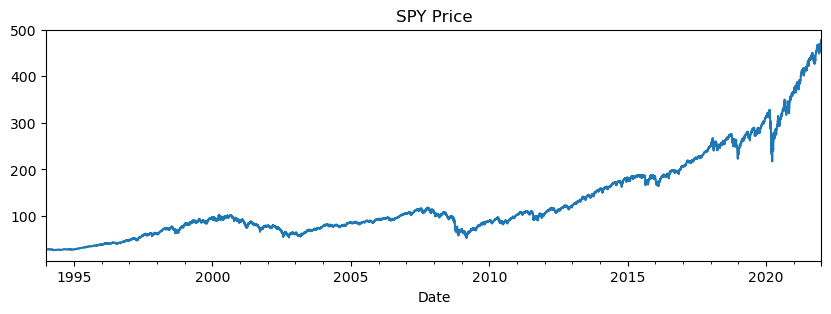

In [11]:
spy.spy_price.plot(figsize=(10,3), title="SPY Price")

<Axes: title={'center': 'SPY Volume'}, xlabel='Date'>

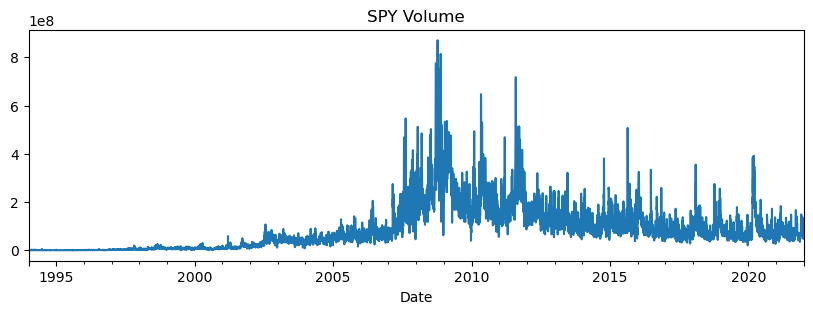

In [12]:
spy.spy_vol.plot(figsize=(10,3), title="SPY Volume")

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose   #Decomposition of Time-Series

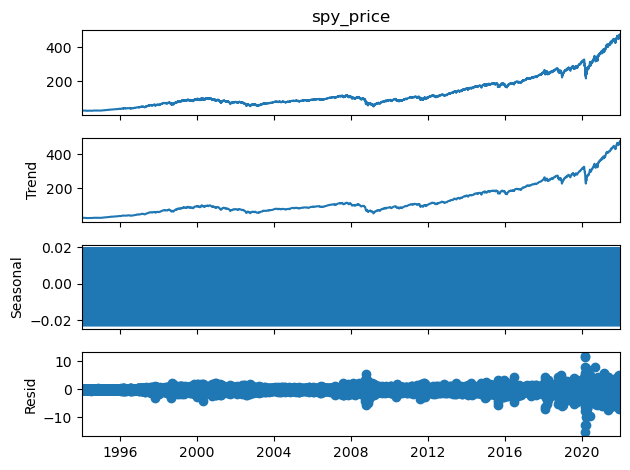

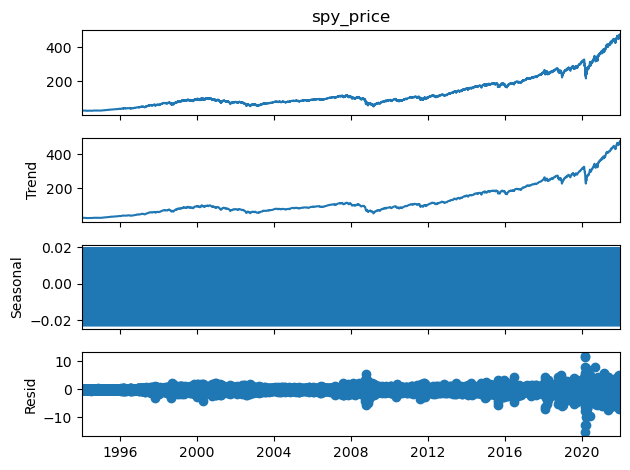

In [14]:
decomp_spy = seasonal_decompose(spy.spy_price,model='additive')
decomp_spy.plot()

<Axes: xlabel='DATE'>

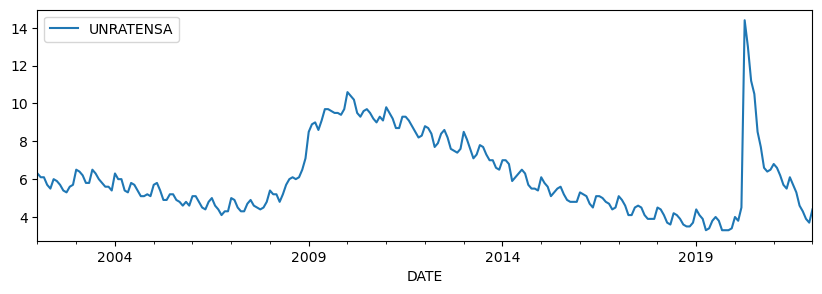

In [16]:
unemp = pd.read_csv("data/data5_UNRATENSA.csv", header=0,index_col=0) #US Unemployment data
unemp.index = pd.to_datetime(unemp.index)
unemp['2002':].plot(figsize=(10,3))

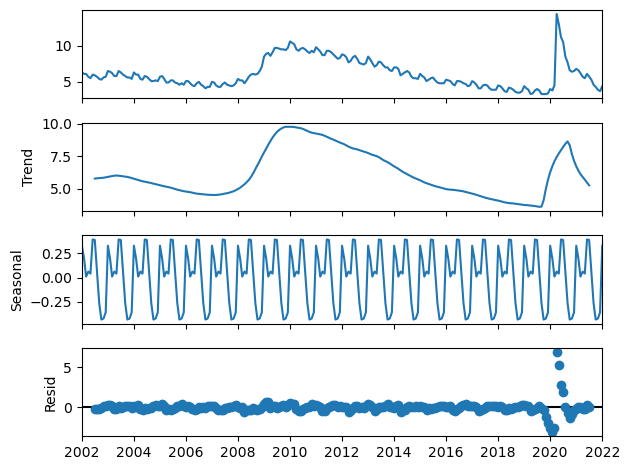

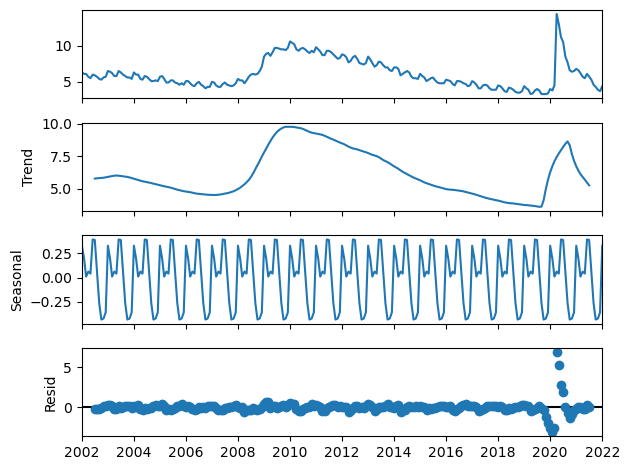

In [17]:
decomp_unemp = seasonal_decompose(unemp['2002':],model='additive')
decomp_unemp.plot()

## White Noise

In [21]:

from numpy import random
random.seed(1001)
#wn = np.random.normal(loc=0, scale=0.03,size=1000)   #<--if you don't have the S&P data
#set the wn distribution as normal
wn = np.random.normal(loc=0, scale=spy.spy_price.std(),size=len(spy))  #gives random results OR set the seed(if you want same results)
#loc:mean, scale:standard deviation(volatility) if you have S&P 500 data scale=spy.spy_price.std(),

In [22]:
spy['wn'] = wn
spy.describe()

,spy_price,spy_vol,wn
count,7304.000000,7.304000e+03,7304.000000
mean,130.777536,8.649372e+07,2.043197
std,92.586625,9.495159e+07,90.725130
min,26.403795,5.200000e+03,-286.612402
25%,73.647396,1.066628e+07,-58.649647
50%,95.041447,6.134810e+07,1.925846
75%,174.074555,1.212696e+08,63.697133
max,477.480011,8.710263e+08,334.432011


<Axes: xlabel='Date'>

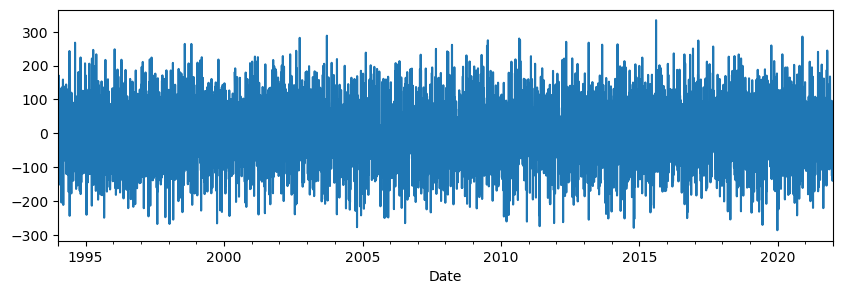

In [23]:
spy.wn.plot(figsize=(10,3))

## Random Walk

In [26]:

wn_rw = np.random.normal(loc=0,scale=0.05,size=len(spy))   #White noise for designing Random walk
rw = np.zeros(len(spy))
spy['rw'] = rw
spy['wn_rw'] = wn_rw
# We need an initial point
spy.rw.iloc[0] = 25


In [27]:
spy

,spy_price,spy_vol,wn,rw,wn_rw
Date,,,,,
1994-01-03,27.784529,960900.0,-100.590403,25.0,-0.048521
1994-01-04,27.896648,164300.0,-82.963646,0.0,-0.030145
1994-01-05,27.952698,710900.0,-28.359225,0.0,0.013067
1994-01-06,27.952698,201000.0,-124.059935,0.0,-0.019406
1994-01-07,28.120859,775500.0,-111.713687,0.0,-0.087216
...,...,...,...,...,...
2021-12-24,470.600006,56439700.0,-140.540771,0.0,0.057695
2021-12-27,477.260010,56808600.0,58.026034,0.0,-0.026296
2021-12-28,476.869995,47274600.0,-57.758558,0.0,-0.103351


In [29]:
#Random Walk (rw)
for i in range(1, len(spy)):
    spy.rw.iloc[i] = spy.rw.iloc[i-1] + spy.wn_rw.iloc[i]
    
spy

,spy_price,spy_vol,wn,rw,wn_rw
Date,,,,,
1994-01-03,27.784529,960900.0,-100.590403,25.000000,-0.048521
1994-01-04,27.896648,164300.0,-82.963646,24.969855,-0.030145
1994-01-05,27.952698,710900.0,-28.359225,24.982922,0.013067
1994-01-06,27.952698,201000.0,-124.059935,24.963516,-0.019406
1994-01-07,28.120859,775500.0,-111.713687,24.876300,-0.087216
...,...,...,...,...,...
2021-12-24,470.600006,56439700.0,-140.540771,24.138600,0.057695
2021-12-27,477.260010,56808600.0,58.026034,24.112304,-0.026296
2021-12-28,476.869995,47274600.0,-57.758558,24.008953,-0.103351


<Axes: xlabel='Date'>

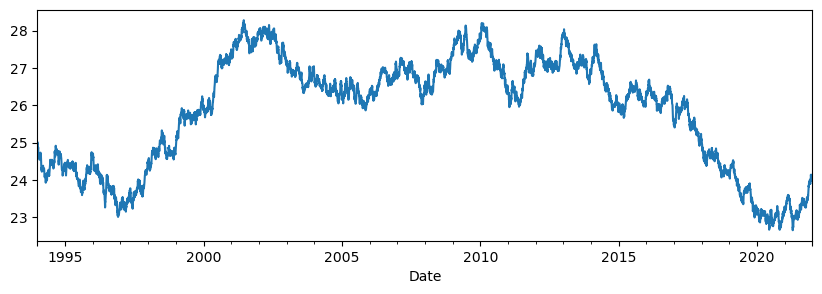

In [30]:
spy.rw.plot(figsize=(10,3))

## Stationarity

In [31]:

import statsmodels.tsa.stattools as sts  #tsa:time series analysis library


In [32]:
sts.adfuller(spy.wn)   #Null: Not stationary   #Results reject the null,Therefore, wn is stationary

(-85.01764882429812,
 0.0,
 0,
 7303,
 {'1%': -3.43124574147567,
  '5%': -2.861935848351703,
  '10%': -2.5669807058245175},
 86140.13773380178)

In [33]:
sts.adfuller(spy.rw)    #Null: Not stationary   #Results do not reject the null,Therefore, rw is not stationary

(-1.2752017536121243,
 0.640439814393683,
 0,
 7303,
 {'1%': -3.43124574147567,
  '5%': -2.861935848351703,
  '10%': -2.5669807058245175},
 -22757.746523895425)

## Autocorrelation

In [34]:
import statsmodels.graphics.tsaplots as sgt

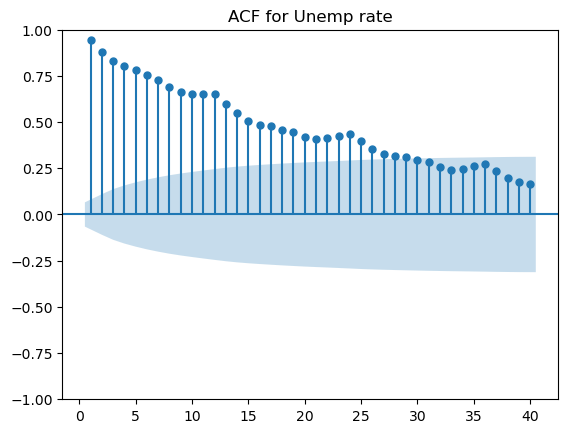

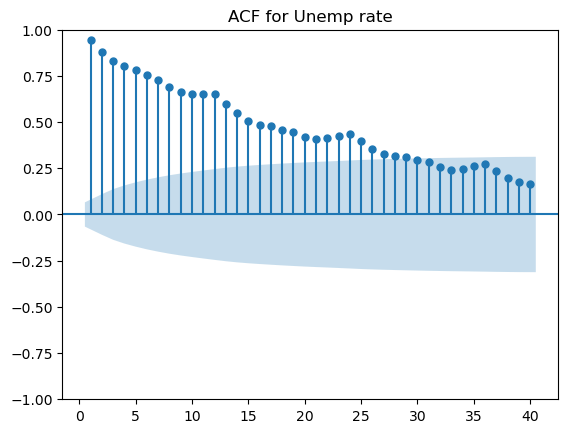

In [35]:
sgt.plot_acf(unemp, lags=40, zero=False, title="ACF for Unemp rate")  #lags 40 months #In the shaded area(confidence interval around zero): cannot distinguish it from 0(statistically indistinguishable from 0)

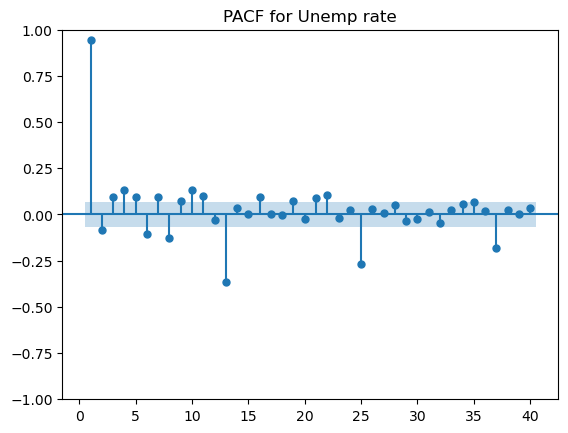

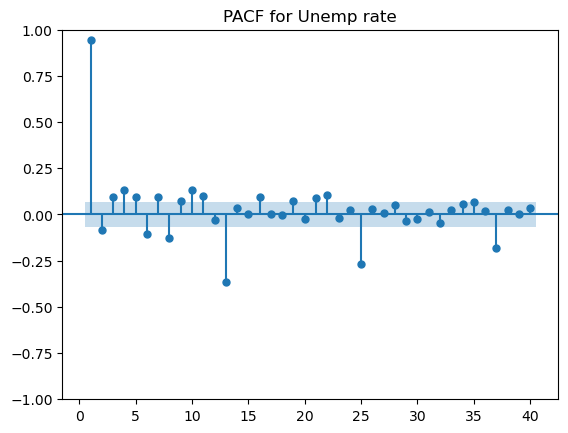

In [36]:
sgt.plot_pacf(unemp, lags=40, zero=False, title="PACF for Unemp rate") #Partial ACF #Results: Only the first lag is important

## Moving Average(Smoothing Time series)

<Axes: xlabel='DATE'>

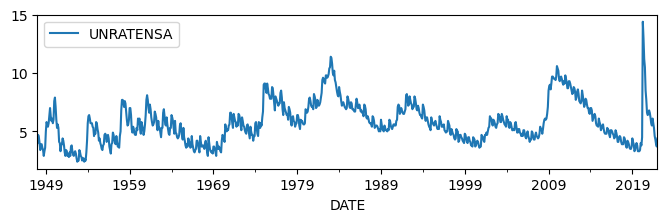

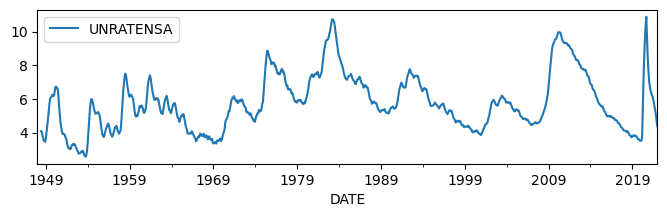

In [37]:

unemp_ma = unemp.rolling(6).mean()  #rolling window of 6
unemp.plot(figsize=(8,2))
unemp_ma.plot(figsize=(8,2))